## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [102]:
# import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [103]:
# Read in the dataset and take a look at the top few rows
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [104]:
# find the number of rows in the dataset
num_rows = df.shape[0]
num_rows

294478

c. The number of unique users in the dataset.

In [105]:
# The number of unique users in the dataset
num_users = df.user_id.nunique()
num_users

290584

d. The proportion of users converted.

In [106]:
# The proportion of users converted
p_converted = df.query('converted == 1').user_id.nunique()/num_users
p_converted

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [107]:
# Check the number of times the landing page not match the group
# supposely 'new_page' should match to 'treatment', and 'old_page' should match to 'control'

df[((df.landing_page=='new_page')==(df.group=='treatment'))== False].shape[0]

3893

f. Do any of the rows have missing values?

In [108]:
# Check any of the rows have missing values
df.isnull().values.any()

False

In [109]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [110]:
# Create a new dataset in which group and landing_page is aligned correctly
df2 = df[((df.landing_page=='new_page')&(df.group=='treatment'))
        |((df.landing_page=='old_page')&(df.group=='control'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [111]:
# find the number of rows in the dataset
df2.shape[0]

290585

In [112]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [113]:
# The number of unique users in the dataset df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [114]:
# Check the duplicated user_id in df2
df2.user_id[df2.user_id.duplicated()==True]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [115]:
# Show the row information for the repeat user_id
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [116]:
# Remove one of the rows with a duplicate user_id, reset index and keep dataframe as df2
df2 = df2.drop(df.index[2893])
df2.reset_index(drop=True, inplace=True)


In [117]:
# find the number of rows in the cleaned dataset (it should equal to 290584 after the duplicated having been removed)
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [118]:
# the probability of an individual converting regardless of the page they receive
prob_convert = df2.converted.mean()
prob_convert

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [119]:
# Create control group subset as df2_control
df2_control = df2.query("group == 'control'")

In [120]:
# the probability of an individual converting in control group
prob_convert_c = df2_control.converted.mean()
prob_convert_c

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [121]:
# Create treatment group subset as df2_treatment
df2_treatment = df2.query("group == 'treatment'")

In [122]:
# the probability of an individual converting in treatment group
prob_convert_t = df2_treatment.converted.mean()
prob_convert_t

0.11880806551510564

d. What is the probability that an individual received the new page?

In [123]:
# the probability that an individual received the new page
df2.groupby('landing_page').user_id.count()[0]/df2.user_id.count()

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Answer: **

**1> There are about 50% of the individuals received the new page, and the other half received the old page. These two data sets are comparable.**

**2> regardless of the received page, the probability of an individual converting is 11.96%.**

**3> Given the individual in control group, the probability of converting is 12.04%.**

**4> Given the individual in treatment group, the probability of converting is 11.88%.**

**5> Although the probability of converting in control group is slightly higher than the treatment group, there is no enough evidence that we could conclude that old page leads to more conversions compared to the new page. We could further check the p-value to see how much probability this observed difference will happen given the no-difference null assumption.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

        Null hypothese H0 : Pold - Pnew >= 0

        Alternative hypothese HA : Pold - Pnew < 0

        Type I error rate: α = 5% 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [124]:
#Assume under the null hypothesis,  p_new  and  p_old  both have "true" success rates equal 
#to the converted success rate regardless of page prob_convert
p_new = prob_convert
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [125]:
p_old = prob_convert
p_old

0.11959708724499628

c. What is $n_{new}$?

In [126]:
# User number of treatment group n_new
n_new = df2_treatment.shape[0]
n_new

145310

d. What is $n_{old}$?

In [127]:
# User number of control group n_old
n_old = df2_control.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [128]:
# Simulate n_new size transactions with a convert rate of p_new under the null
new_page_converted = np.random.choice([0,1] ,size = n_new, p=[(1-p_new),p_new])

In [129]:
# Calculate simulated transactions conversion rate
new_page_converted.mean()

0.11829880944188287

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [130]:
# Simulate n_old size transactions with a convert rate of p_old  under the null
old_page_converted = np.random.choice([0,1] ,size = n_old, p=[(1-p_old), p_old])

# Calculate simulated transactions conversion rate
old_page_converted.mean()

0.12022798298387874

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [131]:
# Calculate the simulated transactions' conversion rates difference
new_page_converted.mean()-old_page_converted.mean()

-0.0019291735419958711

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [132]:
# Simulate 10,000 times n_new size transactions with a convert rate of p_new under the null
# Simulate 10,000 times n_old size transactions with a convert rate of p_old under the null
# Calculate the conversion rates difference
p_diffs= np.random.binomial(n_new, p_new, 10000)/n_new\
        -np.random.binomial(n_old, p_old, 10000)/n_old

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

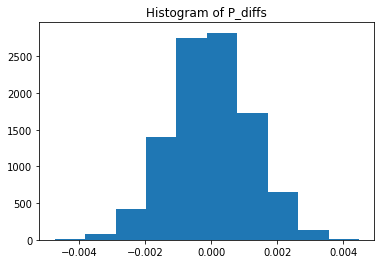

In [133]:
# Plot a histogram of these 10000 p_diffs
plt.hist(p_diffs);
plt.title("Histogram of P_diffs");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

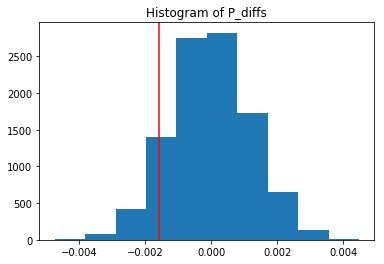

In [134]:
# draw the observed difference (diff) with histogram of p_diffs
diff = prob_convert_t - prob_convert_c
plt.hist(p_diffs);
plt.axvline(x= diff, color = 'red');
plt.title("Histogram of P_diffs");

In [135]:
# Calculate proportion of the p_diffs are greater than the observed difference (diff)
p_diffs = np.array(p_diffs)
(p_diffs > diff).mean()

0.90400000000000003

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer: **

**1> Assume under the null hypothesis,  p_new and p_old both have "true" success rates equal to the converted success rate regardless of page. We repeated and simulated 10,000 times independent experiments of the same sizes, same p_new and p_old. So there will be 10,000 p_diffs. In part i, the histogram of these 10,000 p_diffs was plotted which represents the sampling distribution of the p_diffs. The overall mean of p_diffs is 0.**

**2> In part j, we are interested in and calculated the proportion of the conversion rate differences were greater than the actual difference observed in ab_data.csv, which is -0.0016. The number is about 0.90, which means about 90% of these 10,000 p_diffs were greater than -0.0016. In scientific studies, this number is called p-value.**

**3> Given the null hypothesis, which is there is no difference on converstion probabilities between the new and old pages, the p-value indicates theoretically the probabilty of the occurence of the observed p_diff. If p-value is very small (less than our alpha of 0.05), this event should not likely happen. When actually it happened, this give us confidence to reject the null hypothesis. If p-value is large, this event should happen with higher probability. Therefore, we fail to reject the null. **

**4> In part j, the calculated p-value is 0.90, it is much more than our alpha of 0.05, we fail to reject the null. This indicated there is no statistically significant difference between the conversion rate of the old page and the new page.**



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [136]:
# import statsmodels.api library  
import statsmodels.api as sm

# Calculate the number of conversions for each page, as well as the number of individuals who received each page 
convert_old = df2_control.converted.sum()
convert_new = df2_treatment.converted.sum()
n_old = df2_control.converted.count()
n_new = df2_treatment.converted.count()

In [137]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [138]:
# use stats.proportions_ztest to compute z_score and p-value

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old],
                           [n_new, n_old],
                           value=None, alternative='larger', prop_var=False)
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

In [139]:
# use scipy.stats to compute the cumulative probability density (>z_score) and the critical value given alpha equal to 0.05

from scipy.stats import norm

print(1- norm.cdf(z_score))

print(norm.ppf(1-0.05))

0.905058312759
1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**

**1> By using built in sm.stats.proportions_ztest, the computed z-score is -1.31. Which means given the difference of conversion rates of this treatment group and control group is normal distribution with mean of 0, standard diviation is 1, the observed difference is about 1.31 standard deviation below the mean 0. When confidence level is 95%, the critical value of  one-tail z-test is equal to 1.64 standard deviation above the mean 0. Apparently our computed z-score -1.31 is less than 1.64, so we fail to reject the null hypothesis. The null hypothesis is that the conversion rate for the control group is larger than or equal to the conversion rate for the treatment group.**

**2> Additionally, since the computed p_value is 0.9051, which is larger than the alpha value of 0.05, we fail to reject the null hypothesis. **

**3> The above conclusions from the computed results by using this built-in method, are highly consistent with our findings in part j and k. **

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer: Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [140]:
# Take a look at the top few rows of df2

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [141]:
# Generate dummy variables on 'landing_page' by using prefix 'ab_page'  and save as a new dataset df2_dummy

df2_dummy = pd.get_dummies(data = df2, columns = ['landing_page'], prefix = ['ab_page'])
df2_dummy.head()

,user_id,timestamp,group,converted,ab_page_new_page,ab_page_old_page
0,851104,2017-01-21 22:11:48.556739,control,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,1,0,1


In [142]:
# Keep one of the generated dummy variables
# Given old_page as our analysis baseline, we only keep ab_page_new_page column in the dataset

df2_dummy = df2_dummy.drop(['ab_page_old_page'],axis=1)
df2_dummy.tail(1)

,user_id,timestamp,group,converted,ab_page_new_page
290583,715931,2017-01-16 12:40:24.467417,treatment,0,1


In [143]:
# Add 'intercept' column in the dataset

df2_dummy['intercept']=1

In [144]:
# Take a look at the last row of df2_dummy

df2_dummy.tail(1)

,user_id,timestamp,group,converted,ab_page_new_page,intercept
290583,715931,2017-01-16 12:40:24.467417,treatment,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [145]:
# Use statsmodels to import regression model

import statsmodels.api as sm

# Instantiate the model
# Target variable is 'converted'
# Predictors: using the 'intercept' column and one predictor column 'ab_page_new_page'

logit_mod = sm.Logit(df2_dummy.converted, df2_dummy[['intercept','ab_page_new_page']])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [146]:
# fit the model and show the summary

logit_result = logit_mod.fit()
logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 May 2018   Pseudo R-squ.:               8.077e-06
Time:                        20:58:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page_new_page    -0.0150      0.011     -1.311      0.190      -0.037       0.007
====================================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**

**1> The p-value associated with ab_page in this logistic regression model is 0.19. This is different with the p-value that was returned from the built-in z test, which was about 0.90.**

**2> The null hypothesis associated with this single predictor logistic regression is that the convert odds are the same regardless of landing page being new or being old. The alternative hypothesis is there are difference on the convert odds when landing page being new compare to the landing page being old. **

**3> The null hypothesis associated with the built-in z test is that the conversion rate of the control group is larger than or equal to the conversion rate of the treatment group. The alternative hypothesis is that the conversion rate of the treatment group is larger.  **



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

**1> In real world, there are a lot of factors might influence whether or not an individual converts, such as user's nationality, education, age, income....etc. or the timing they are doing the conversion decision. To do some qualitative analysis and add related factors into our regression model, this may make the model more understandable, more predictable, and yield more comprehensive business insights, which lead to more options of the actions. For example, in this case, according to the above z-test and regression result, statistically we reject the null, which means that we have no confidence the new landing page lead to higher conversion rate; However, when we consider more factors, such as countries and day of the week, it may be possible that we could find out some small segment, where the new landing page performed better.**

**2> The disadvantages to adding additional factors are the increasing difficuties, complexity and cost of the project. There are much more effort on data wrangling, cleaning and transforming, associated with more data quality issues and misinterpretation of the data and results.**


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [147]:
# Read in the countries.csv
# Take a look at the top few rows of the dataset

df_countries = pd.read_csv("countries.csv")
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [148]:
# Check how many unique user_id and countries in the dataset

df_countries.nunique()

user_id    290584
country         3
dtype: int64

In [149]:
# Check missing value

df_countries.isnull().sum()

user_id    0
country    0
dtype: int64

In [150]:
# Set 'user_id' as index in df_countries

df_countries.set_index('user_id', inplace=True)

In [151]:
# Set 'user_id' as index in df2_dummy

df2_dummy.set_index('user_id', inplace=True)

In [152]:
# Joined df_countries and df2_dummy on index

df_joined=df_countries.join(df2_dummy)
df_joined.tail(1)

,country,timestamp,group,converted,ab_page_new_page,intercept
user_id,,,,,,
934996,UK,2017-01-09 00:30:08.377677,control,0,0,1


In [153]:
# Generate dummy variables on column 'country'

df_joined_dummy = pd.get_dummies(data=df_joined, columns=['country'])
df_joined_dummy.head()

,timestamp,group,converted,ab_page_new_page,intercept,country_CA,country_UK,country_US
user_id,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,0,0,1,0,1,0
928468,2017-01-23 14:44:16.387854,treatment,0,1,1,0,0,1
822059,2017-01-16 14:04:14.719771,treatment,1,1,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,0,0,1,0,1,0
710616,2017-01-16 13:14:44.000513,treatment,0,1,1,0,1,0


In [154]:
# Instantiate the model by using sm.Logit
# Target variable is 'converted'
# Predictors: using the 'intercept' column and three predictor column 'ab_page_new_page', 'country_UK', 'country_US'

logit_mod_joined = sm.Logit(df_joined_dummy.converted, \
                           df_joined_dummy[['intercept', 'ab_page_new_page',\
                                            'country_UK', 'country_US']])

In [155]:
# Fit the model the show the result summary

logit_mod_joined_result = logit_mod_joined.fit()
logit_mod_joined_result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 May 2018   Pseudo R-squ.:               2.323e-05
Time:                        20:58:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page_new_page    -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK           0.0506      0.028      1.784      0.074      -0.005       0.106
country_US           0.0408      0.027      1.516      0.130      -0.012       0.093
====================================================================================
"""

In [156]:
# Calculate the odds ratio of the variables compare to the baseline

np.exp(logit_mod_joined_result.params)

intercept           0.131332
ab_page_new_page    0.985168
country_UK          1.051944
country_US          1.041599
dtype: float64

In [157]:
# Calculate the conversion rates by country

df_joined.groupby('country').converted.mean()

country
CA    0.115318
UK    0.120594
US    0.119547
Name: converted, dtype: float64

**Question: Does it appear that country had an impact on conversion?**

**Answers**

**1> According to the data we have, the conversion rate by country is slightly different, Canada is 11.53%, US is 11.95% and UK is 12.06%.**

**2> We generated three dummy variables on 'country'column. Treat the Canada as the baseline, we fit the logistic regression to check the countries' impact on conversion.**

**3> According to the summary result, holding other variables as constant, US users are 1.04 times more likely to convert compare to Canadian users. However, because the p-values is 0.13, which is less than alpha 0.05. this odds difference is not statistically significant.** 

**4> Holding other variables as constant, UK users are 1.05 times more likely to convert compare to Canadian users. However, because the p-values is 0.074, which is less than alpha 0.05. this odds difference is not statistically significant.**

**5> Overall, these results are not statistically significant to conclude that country had an impact on conversion.**


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [158]:
# Calculate the user numbers of control group and treatment group in different countries

df_joined.groupby(['country','ab_page_new_page']).converted.count()

country  ab_page_new_page
CA       0                     7198
         1                     7301
UK       0                    36360
         1                    36106
US       0                   101716
         1                   101903
Name: converted, dtype: int64

In [159]:
# Calculate the conversion rates of control group and treatment group in different countries

df_joined.groupby(['country','ab_page_new_page']).converted.mean()

country  ab_page_new_page
CA       0                   0.118783
         1                   0.111902
UK       0                   0.120022
         1                   0.121171
US       0                   0.120630
         1                   0.118466
Name: converted, dtype: float64

In [160]:
# Generate three new dummy variables

df_joined_dummy['ab_page_new_CA'] = df_joined_dummy['ab_page_new_page'] * df_joined_dummy['country_CA']
df_joined_dummy['ab_page_new_UK'] = df_joined_dummy['ab_page_new_page'] * df_joined_dummy['country_UK']
df_joined_dummy['ab_page_new_US'] = df_joined_dummy['ab_page_new_page'] * df_joined_dummy['country_US']

In [161]:
# Fit the model the show the result summary

logit_mod_joined2 = sm.Logit(df_joined_dummy.converted, \
                           df_joined_dummy[['intercept', \
                                            'ab_page_new_CA', 'ab_page_new_UK', 'ab_page_new_US']])
logit_mod_joined2_result = logit_mod_joined2.fit()
logit_mod_joined2_result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 May 2018   Pseudo R-squ.:               3.351e-05
Time:                        20:58:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.06785
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page_new_CA    -0.0827      0.038     -2.176      0.030      -0.157      -0.008
ab_page_new_UK     0.0074      0.018      0.410      0.682      -0.028       0.043
ab_page_new_US    -0.0183      0.013     -1.449      0.147      -0.043       0.006
==================================================================================
"""

In [162]:
# Calculate the odds ratio of the variables compare to the baseline

np.exp(logit_mod_joined2_result.params)

intercept         0.136863
ab_page_new_CA    0.920649
ab_page_new_UK    1.007417
ab_page_new_US    0.981901
dtype: float64

In [163]:
1/_

intercept         7.306593
ab_page_new_CA    1.086191
ab_page_new_UK    0.992638
ab_page_new_US    1.018432
dtype: float64

**Question: Does an interaction between page and country has significant effect on conversion?**

**Answers:**

**1> According to the data we have, the conversion rate of control group and treatment group in different countries are slightly different. Given users in Canada, the control group conversion rate is 11.88%, treatment group(new page) is 11.19%; Given users in UK, the control group conversion rate is 12.00%, treatment group(new page) is 12.12%; Given users in US, the control group conversion rate is 12.06%, treatment group(new page) is 11.85%.**

**2> We generated three intersection variables. Treat the control group in each country as the baseline, we fit the logistic regression to check the intersections' impact on conversion. Considering the predictors need be independent, we don't put 'ab_page_new_page' and single country variables into the logistic model.** 

**3> According to the logistic regression summary result, holding other variables as constant, given the Canadian users, if the user receive the old page, they are 1.09 times more likely to convert compare to receiving the new page. Additionally, because the p-value is equal to 0.03, which is less than alpha 0.05, this odds difference is statistically significant. **

**4> According to the logistic regression summary result, holding other variables as constant, given the US users, if the user receive the old page, they are 1.02 times more likely to convert compare to receiving the new page. However, because the p-value is equal to 0.15, which is more than alpha 0.05, this odds difference is not statistically significant. **

**5> According to the logistic regression summary result, holding other variables as constant, given the UK users, if the user receive the new page, they are 1.01 times more likely to convert compare to receiving the old page. However, because the p-value is equal to 0.68, which is much more than alpha 0.05, this odds difference is not statistically significant. **


<a id='conclusions'></a>
## Conclusions

**1> Our goal is to analyze this a/b test data to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision. The eveluation metrics in this project is conversion rate. **

**2> The test had been running for 3 weeks and in three countries. There are 145310 (about 50%) individuals received the new page, 145274 individuals received the old page. These two data sets are with large size and comparable.**

**3> regardless of the received page, the probability of an individual converting is 11.96%. Given the individual in control group, the probability of converting is 12.04%. Given the individual in treatment group, the probability of converting is 11.88%. Although the probability of converting in control group is slightly higher than the treatment group, accoding to our z-test and logistic regression approach result, due to the p-value is much higher than alpha 0.05, we fail to reject the null hypothesis. We have no confidence to conclude the new page lead to higher conversion rate.**

**4> According to the data we have, the conversion rate by country is slightly different, Canada is 11.53%, US is 11.95% and UK is 12.06%. However, by using the logistic regression, the results are not statistically significant to conclude that country had an impact on conversion. However when we further evaluate the impact of interactions between page and country, we found holding other variables as constant, given the Canadian users, if the user receive the old page, they are 1.09 times more likely to convert compare to receiving the new page. Additionally, because the p-value is equal to 0.03, which is less than alpha 0.05, this odds difference is statistically significant. **

**5> Assume for Canadian users, practically we set 2% change on the conversion rate as our practical significance level, we could conclude that the company the best keep the old page. For US and UK users, maybe we need run the experiment longer.Additionaly, we may considering adding more factors and gathering more data to the analyis, which lead to more options of the actions.**



### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.